# Imports

In [87]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.inspection import permutation_importance
from sklearn import metrics
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Data

In [88]:
df = pd.read_csv("Datasets/athlete_events_new.csv")

In [89]:
current = df[["Age", "Height","Weight", "Sport"]].dropna()

### Preview

In [90]:
current.head()

,Age,Height,Weight,Sport
0,24.0,180.0,80.0,6.0
1,23.0,170.0,60.0,26.0
2,21.0,185.0,82.0,43.0
3,21.0,185.0,82.0,43.0
4,25.0,185.0,82.0,43.0


In [91]:
current.corr()

,Age,Height,Weight,Sport
Age,1.000000,0.141684,0.212041,-0.066225
Height,0.141684,1.000000,0.796573,0.033330
Weight,0.212041,0.796573,1.000000,0.083851
Sport,-0.066225,0.033330,0.083851,1.000000


### Checking for Missing Values

In [92]:
missing_values = current.isnull().sum()
missing_values

Age       0
Height    0
Weight    0
Sport     0
dtype: int64

We're all good to move ahead!

# Understanding the Data
***
### Correlation Heat Map
We use this to understand the strength and direction of the relationships between variables in our dataset. We can see that one pairs of highly correlated variables are Height and Weight, which follow with the idea that they are strong factors in determining success in a given Olympic event.

<Axes: >

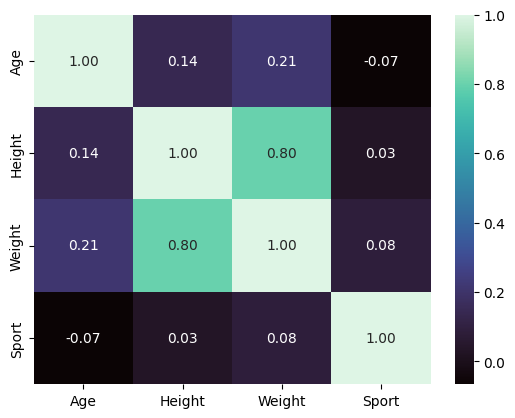

In [93]:
numeric_data = current.select_dtypes(include=['float64', 'int64'])
corr_matrix = numeric_data.corr()
sns.heatmap(data=corr_matrix, annot=True, fmt='.2f', cmap='mako')

### Distribution of Data

We set up these box plots to better understand the distribution patterns of our data. Most ages are between 20 and 30. Most heights are between 170 and 185. Most weights are between 60 to 80 kg. The weights are a little more complicated to understand as they depend on what classes correspond to which number.

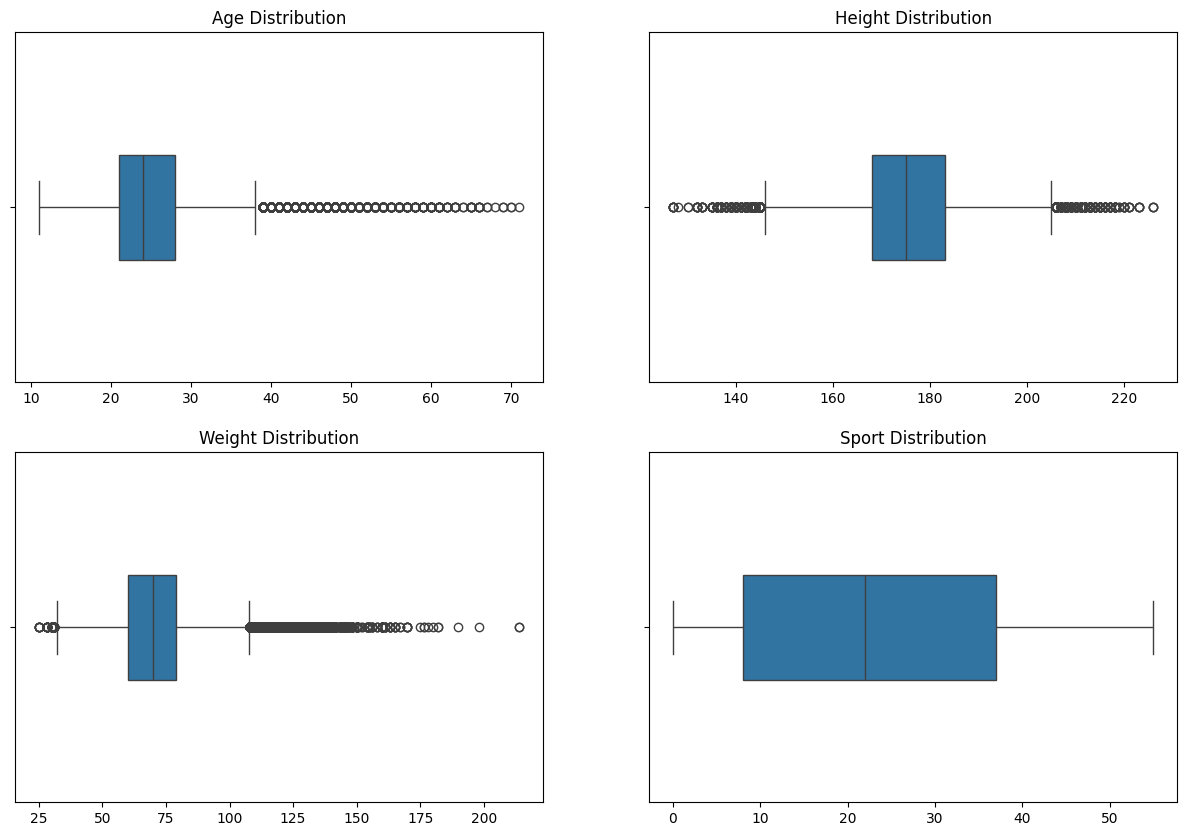

In [105]:
current = df[["Age", "Height","Weight", "Sport", "Medal"]].dropna()
fig, axes = plt.subplots(2, 2, figsize=(15, 10))

sns.boxplot(x=current['Age'], ax=axes[0, 0], width=0.3) 
axes[0, 0].set_title('Age Distribution')
axes[0, 0].set_xlabel('')

sns.boxplot(x=current['Height'], ax=axes[0, 1], width=0.3)
axes[0, 1].set_title('Height Distribution')
axes[0, 1].set_xlabel('')

sns.boxplot(x=current['Weight'], ax=axes[1, 0], width=0.3)
axes[1, 0].set_title('Weight Distribution')
axes[1, 0].set_xlabel('')

sns.boxplot(x=current['Sport'], ax=axes[1, 1], width=0.3)
axes[1, 1].set_title('Sport Distribution')
axes[1, 1].set_xlabel('')

plt.show()

# Random Forest Classifier

The first model we'll attempt to fit our data towards is a Random Forest Classifier, which is a supervised form of ML.

In [106]:
current = df[["Age", "Height","Weight", "Sport", "Medal"]].dropna()
X = current[["Age", "Height", "Weight", "Sport"]]
Y = current[["Medal"]]

In [107]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.25)

In [108]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(n_estimators=300, max_depth=15, min_samples_split=10, min_samples_leaf=4, bootstrap=True, random_state=42)
model.fit(X_train, Y_train.values.ravel())

RandomForestClassifier(max_depth=15, min_samples_leaf=4, min_samples_split=10,
                       n_estimators=300, random_state=42)

In [109]:
Y_pred = model.predict(X_test)

In [110]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

accuracy = accuracy_score(Y_test, Y_pred)
precision = precision_score(Y_test, Y_pred, average="weighted")
recall = recall_score(Y_test, Y_pred, average="weighted")
f1 = f1_score(Y_test, Y_pred, average="weighted")

print("Accuracy: %.3f" % accuracy)
print("Precision: %.3f" % precision)
print("Recall: %.3f" % recall)
print("F1-Score: %.3f" % f1)

Accuracy: 0.857
Precision: 0.782
Recall: 0.857
F1-Score: 0.791


## Results

We were pretty happy with 85.7% accuracy for now, but it's important to take some time to understand what all these results mean.

85.7% of total predictions were correct.
78.2% of positive predictions were correct.
85.7% of actual positive cases were correctly predicted.
79.1% was our measure of precision and recall, and the balance between both.

In the next few weeks, we hope to improve our model by potentially including more data, trying a different algorithm, hyperparameter tuning, and other strategies.

### Feature Importance

<ErrorbarContainer object of 3 artists>

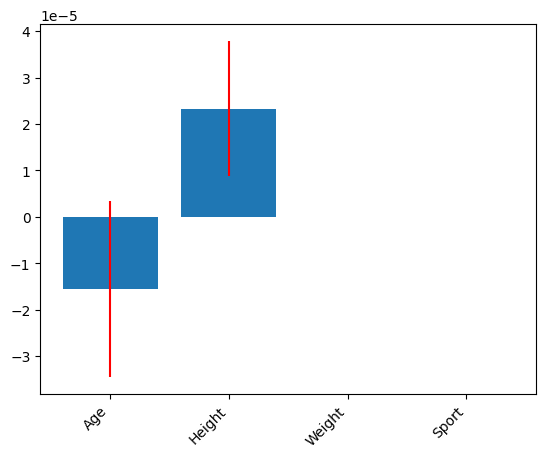

In [117]:
result = permutation_importance(model, X_test, Y_test)
plt.bar(range(X_test.shape[1]), result.importances_mean, tick_label=X_test.columns)
plt.xticks(rotation=45, ha='right')
# plt.show()
plt.errorbar(range(X_test.shape[1]), result.importances_mean, yerr=result.importances_std, ls='none', color="r")

As we can see, _ and _ were the most imporant features in making an estimation.

# Logistic Regression

Now, we'll attempt to fit our data into a Logistic Regression, which is also a supervised form of ML. 

In [129]:
current = df[["Age", "Height","Weight", "Sport", "Medal"]].dropna()

In [130]:
X = current[["Age", "Height", "Weight", "Sport"]]
Y = current[["Medal"]]

In [131]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.25)

In [132]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(random_state=17)
model.fit(X_train, Y_train)
y_pred = model.predict(X_test)

/Users/rishikeshbadari/Documents/Projects/venv/lib/python3.11/site-packages/sklearn/utils/validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [133]:
accuracy = accuracy_score(Y_test, y_pred)
precision = precision_score(Y_test, y_pred, average="weighted", zero_division=0.0)
recall = recall_score(Y_test, y_pred, average="weighted", zero_division=0.0)
f1 = f1_score(Y_test, y_pred, average="weighted")

print("Accuracy: %.3f" % accuracy)
print("Precision: %.3f" % precision)
print("Recall: %.3f" % recall)
print("F1-Score: %.3f" % f1)

Accuracy: 0.853
Precision: 0.727
Recall: 0.853
F1-Score: 0.785


## Results

We were pretty pleased with these results as well, with 85.3% accuracy. Overall, these are what the results mean:

85.3% of total predictions were correct.
72.7% of positive predictions were correct.
85.3% of actual positive cases were correctly predicted.
78.5% was our measure of precision and recall, and the balance between both.

These results were pretty similar to Random Forest Classifier, so we suspect that improvements to one may lead to improvements in another.

### Feature Importance

[0. 0. 0. 0.]


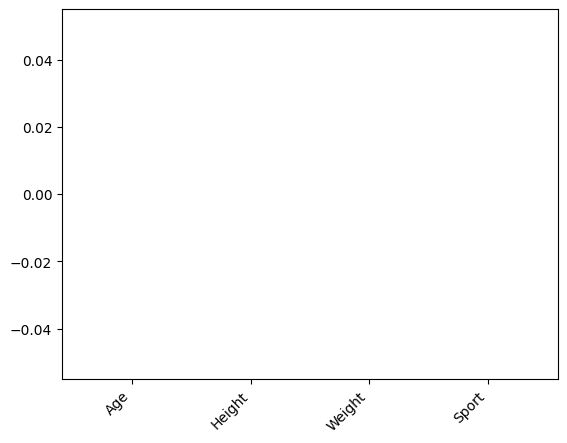

In [144]:
result = permutation_importance(model, X_test, Y_test)
print(result.importances_mean)
plt.bar(range(X_test.shape[1]), result.importances_mean, tick_label=X_test.columns)
plt.xticks(rotation=45, ha='right')
plt.show()
# plt.errorbar(range(X_test.shape[1]), result.importances_mean, yerr=result.importances_std, ls='none', color="r")